In [3]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_visualization as dv
from copy import deepcopy
import time
from pathlib import Path
import pandas as pd
from IPython.display import display
from scipy.stats import iqr
from scipy import stats
    
import read_data_functions as rdf
import plot_functions as pf
from Optimal_Stopping_Object import ModelConstructor
from initializer import InitialThangs
import Statistics as st
import loss_functions as lf
import constants
# import viper as vp
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

EXPERIMENT = "Exp1"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')

In [4]:
EXPERIMENT = "Exp1"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
wheel = dv.ColorWheel()

# Get path and save path 
LOAD_PATH = Path(rf"D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_{EXPERIMENT}")
SAVE_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\paper\figures")
it = InitialThangs(EXPERIMENT)

# Data

In [5]:
if "group" not in locals():
    group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials", movement_metric_type='position')
else:
    if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
        group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")

if "group2" not in locals():
    group2 = rdf.generate_subject_object_v3("Exp2", "All Trials", movement_metric_type='position')
else:
    if group2.exp_info.experiment != "Exp2":  # This means i changed experiment and need to run again
        group2 = rdf.generate_subject_object_v3("Exp2", "All Trials")

# Stats

In [6]:
#* Get dataframe and create the stats inputs
# TODO LOAD IN THE DATAFRAME FROM RESULTS/PARTICIPANT_DATA

df = st.generate_dataframe(group, EXPERIMENT, DROP_SUBJECT_NUM=None)

stats_inputs = st.Inputs(
    df, experiment = EXPERIMENT, num_subjects = len(df['Subject'].unique()), 
    num_blocks=it.num_blocks,num_trials=it.num_trials,
    trial_block_titles=it.trial_block_titles,xlab=it.xlabel,
    f1_xticklabels=it.f1_collapse_xticklabs,f2_xticklabels=it.f2_collapse_xticklabs,
    f1_xlabel=it.f1_xlabel,f2_xlabel=it.f2_xlabel,
    M = 1e6
)

#* Median Movement Onset
median_movement_onset_anova = st.Anova('Median_Movement_Onset_Time', stats_inputs)
print("Median Movement Onset Time")
display(median_movement_onset_anova.anova)
median_movement_onset_boot = st.Bootstrap(stats_inputs, median_movement_onset_anova,
                                          no_collapse=False, alternative='two-sided', test='median')
median_movement_onset_statistics = median_movement_onset_boot.run_bootstrap()

#* Median Movement Onset
sd_movement_onset_anova = st.Anova('SD_Movement_Onset_Time', stats_inputs)
print("SD Movement Onset Time")
display(sd_movement_onset_anova.anova)
sd_movement_onset_boot = st.Bootstrap(stats_inputs, median_movement_onset_anova,
                                          no_collapse=False, alternative='two-sided', test='median')
sd_movement_onset_statistics = sd_movement_onset_boot.run_bootstrap()

#* Wins
wins_anova = st.Anova('Wins', stats_inputs)
print("Wins")
display(wins_anova.anova)
wins_boot = st.Bootstrap(stats_inputs, wins_anova,no_collapse=False,alternative='two-sided')
wins_statistics = wins_boot.run_bootstrap()
#* Incorrects
incorrects_anova = st.Anova('Incorrects', stats_inputs)
print("Incorrects")
display(incorrects_anova.anova)
incorrects_boot = st.Bootstrap(stats_inputs, incorrects_anova,no_collapse=False,alternative='two-sided')
incorrects_statistics = incorrects_boot.run_bootstrap()
#* Indecisions
indecisions_anova = st.Anova('Indecisions', stats_inputs)
print("Indecisions")
display(indecisions_anova.anova)
indecisions_boot = st.Bootstrap(stats_inputs, indecisions_anova, no_collapse=False, alternative='two-sided')
indecisions_statistics = indecisions_boot.run_bootstrap()

c:\Users\Seth Sullivan\anaconda3\envs\aim1\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


!! DROPPING SUBJECT None !! 
Median Movement Onset Time


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor_1,59699.487500,2,38,29849.743750,4.360600,0.019730,0.030075,0.031095,0.775649
1,Factor_2,66811.602083,1,19,66811.602083,6.815716,0.017188,0.017188,0.034671,1.000000
2,Factor_1 * Factor_2,2723.429167,2,38,1361.714583,0.521157,0.598016,0.565215,0.001462,0.828255


Non-significant interaction, collapsing across conditions...
SD Movement Onset Time


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor_1,15203.650706,2,38,7601.825353,5.501936,0.007971,0.018015,0.041648,0.691673
1,Factor_2,10047.983589,1,19,10047.983589,20.361034,0.000238,0.000238,0.027919,1.000000
2,Factor_1 * Factor_2,3851.588749,2,38,1925.794374,2.485900,0.096694,0.097401,0.010889,0.988805


Non-significant interaction, collapsing across conditions...
Wins


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor_1,13373.671875,2,38,6686.835938,51.777019,1.407231e-11,2.670757e-09,0.501585,0.759118
1,Factor_2,579.700521,1,19,579.700521,8.951407,7.495068e-03,7.495068e-03,0.041799,1.000000
2,Factor_1 * Factor_2,2636.119792,2,38,1318.059896,23.729079,2.053863e-07,3.546155e-06,0.165531,0.770944


Significant interaction, doing pairwise bootstraps for each condition...
Incorrects


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor_1,5953.854167,2,38,2976.927083,29.795407,1.648612e-08,1.588739e-07,0.246655,0.847537
1,Factor_2,157.552083,1,19,157.552083,2.522493,1.287353e-01,1.287353e-01,0.008590,1.000000
2,Factor_1 * Factor_2,556.354167,2,38,278.177083,3.722088,3.340427e-02,4.280908e-02,0.029687,0.829146


Significant interaction, doing pairwise bootstraps for each condition...
Indecisions


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor_1,2481.432292,2,38,1240.716146,10.003995,0.000323,0.000528,0.111388,0.910429
1,Factor_2,132.825521,1,19,132.825521,1.017642,0.325754,0.325754,0.006665,1.000000
2,Factor_1 * Factor_2,1216.432292,2,38,608.216146,5.577994,0.007515,0.013381,0.057891,0.785547


Significant interaction, doing pairwise bootstraps for each condition...


# Plotting Constants

In [7]:
collapse_colors = [
    wheel.blend_colors(constants.xticklabel_colors_means[0],constants.xticklabel_colors_means[3]),
    wheel.blend_colors(constants.xticklabel_colors_means[1],constants.xticklabel_colors_means[4]),
    wheel.blend_colors(constants.xticklabel_colors_means[2],constants.xticklabel_colors_means[5])
]

# Data Figure

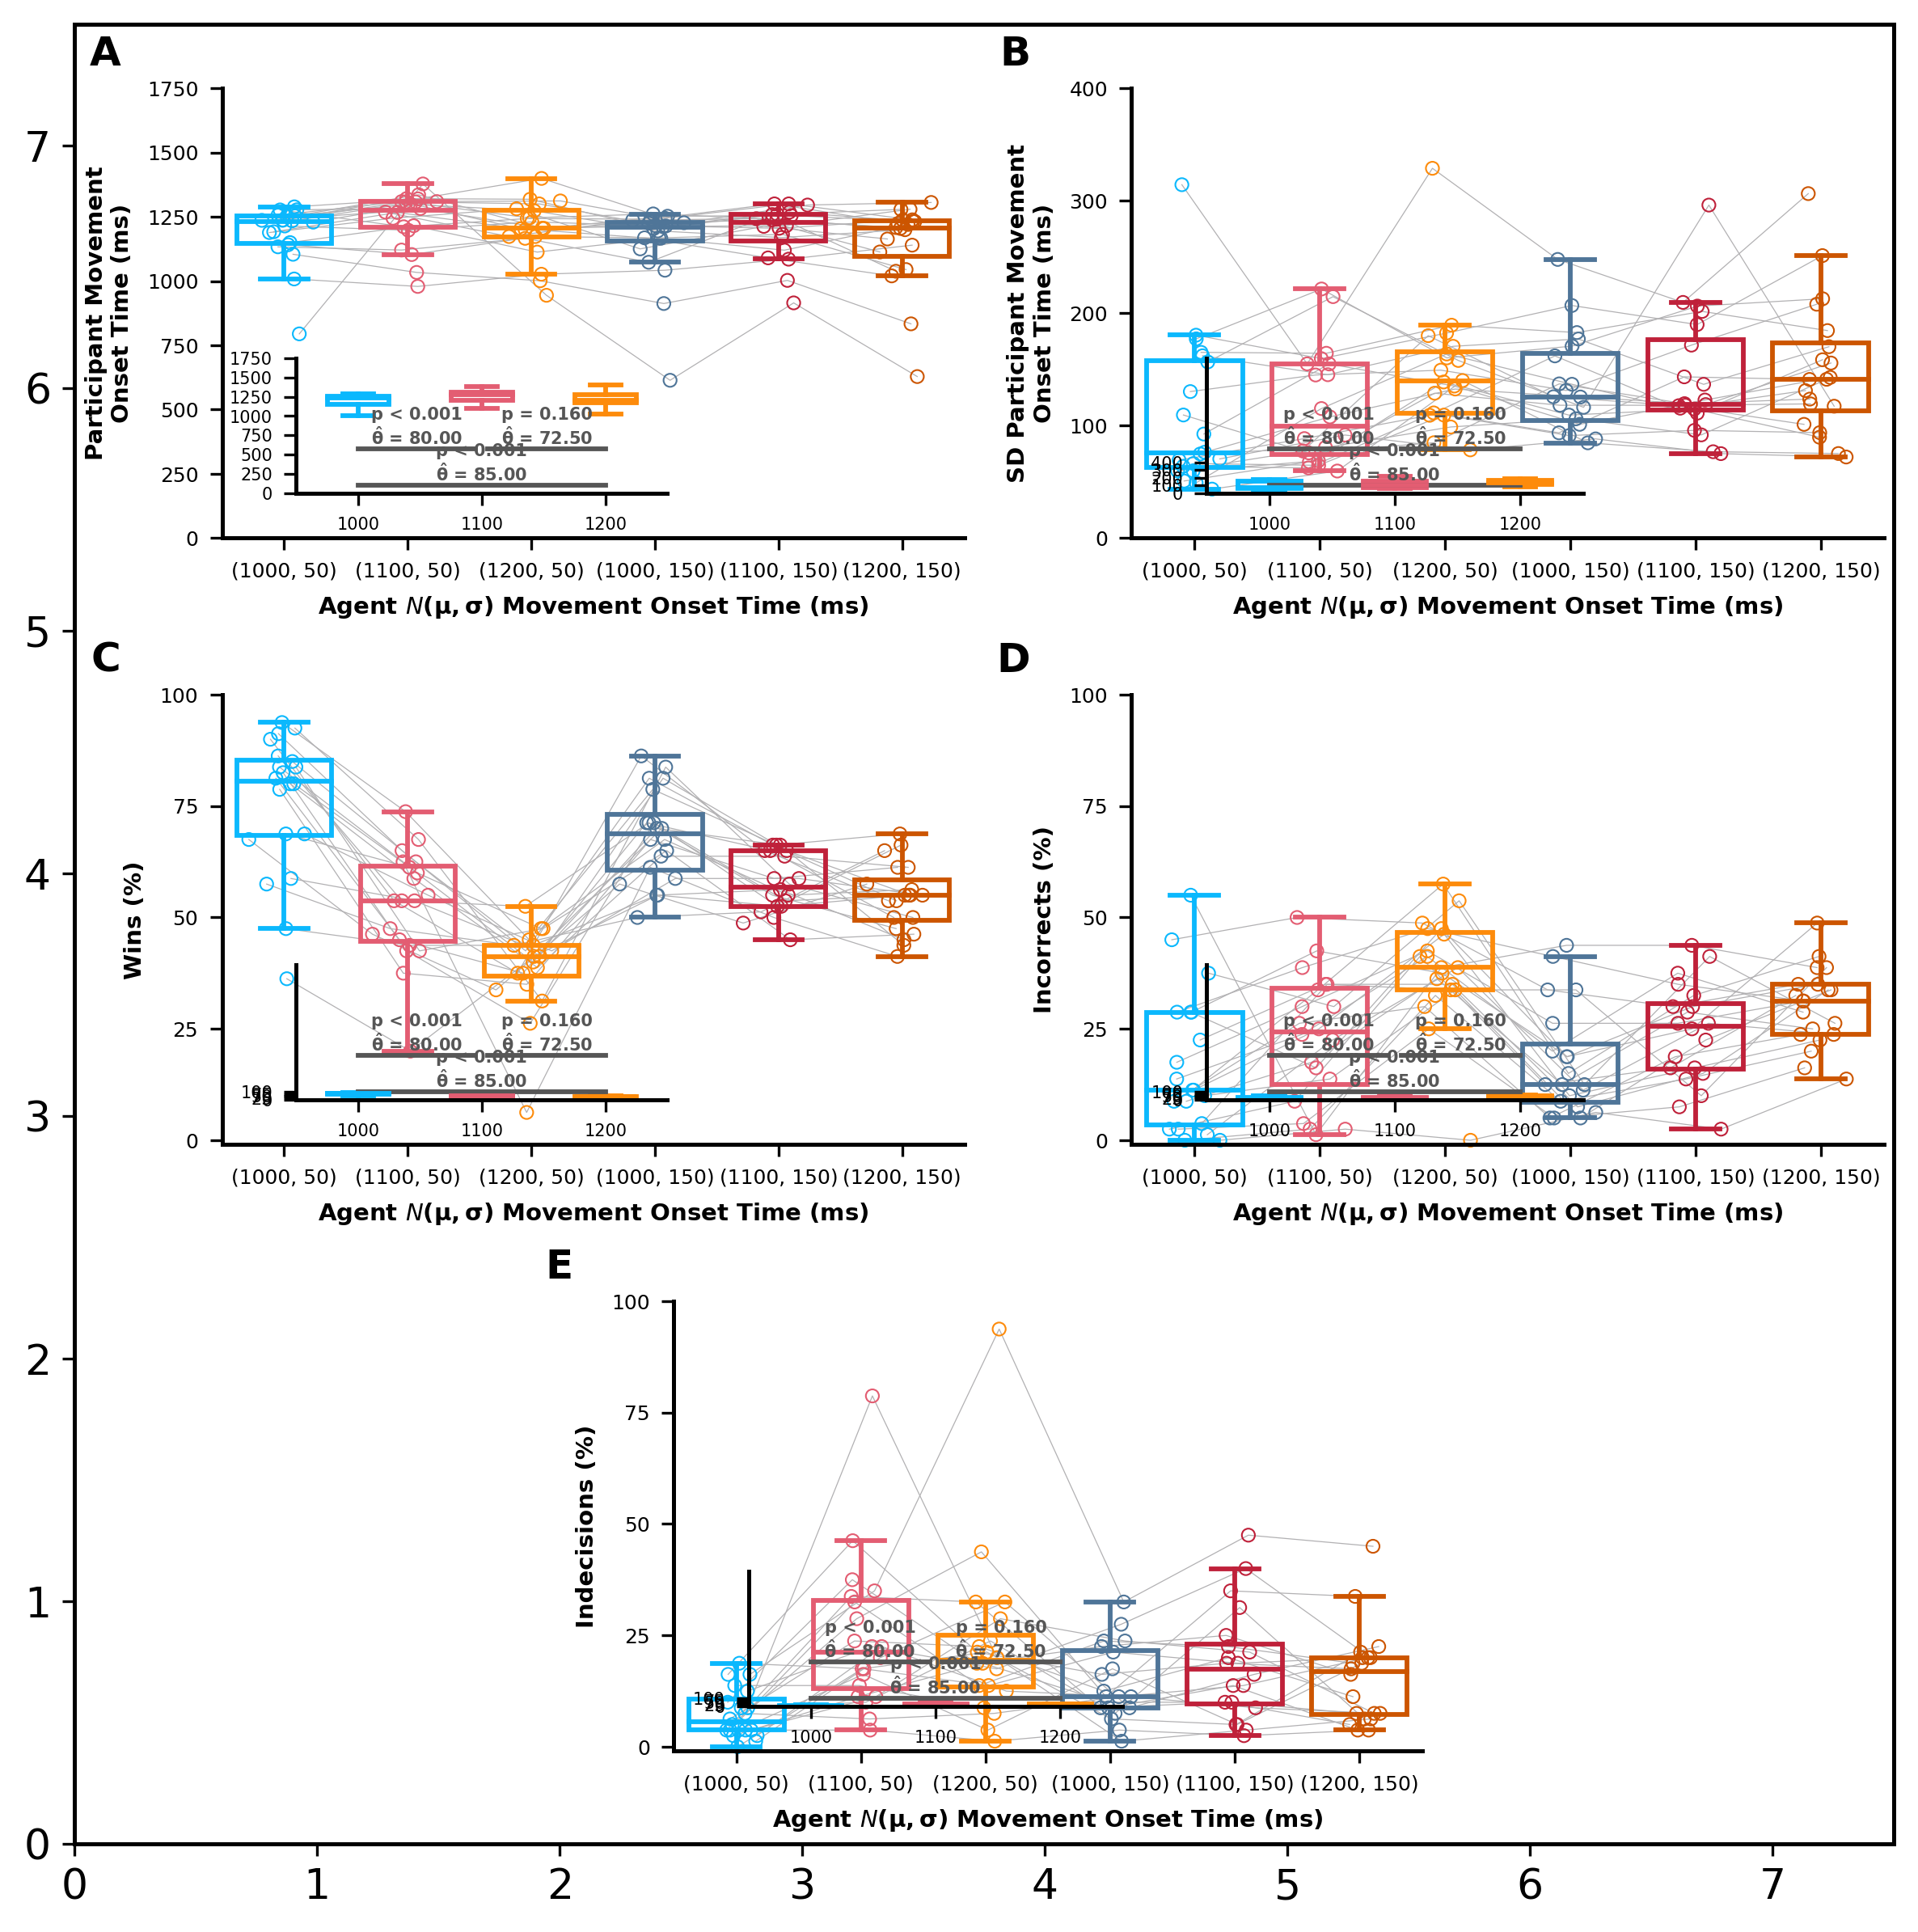

In [21]:

save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 7.5, 7.5
bw = (
    0.35 * w
) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 5
ticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 15

metrics = np.array(
    [
        np.nanmedian(group.movement_metrics.movement_onset_times("task"),2),
        np.nanstd(group.movement_metrics.movement_onset_times("task"),2),
        group.score_metrics.score_metric("wins")/it.num_trials*100,
        group.score_metrics.score_metric("incorrects")/it.num_trials*100,
        group.score_metrics.score_metric("indecisions")/it.num_trials*100,
    ]
)[
    :, :, [0, 2, 4, 1, 3, 5]
]  # Rearranging axes to get the order I want
ylocs = (
    [np.arange(0, 1751, 250)] + [np.arange(0, 401, 100)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset Time (ms)",
    "SD Participant Movement\nOnset Time (ms)",
    "Wins (%)",
    "Incorrects (%)",
    "Indecisions (%)",
]
ylims = [(0, 1750)] + [(0, 400)] + [(-1, 100)] * 3

model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
mosaic = "aabb;ccdd;.ee."
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
figure_statistics = [median_movement_onset_statistics,sd_movement_onset_statistics,
                     indecisions_statistics,
                     wins_statistics, incorrects_statistics]
# * Looping axes for each metric
for i, ax in enumerate(axs):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4
        )

    dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
                    data_color = constants.xticklabel_colors_means,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.06, include_mean = False, circle_size=markersize)

    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize)
    # dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    inset_ax = ax.inset_axes((0.1,0.1,0.5,0.3))
    inset_xlocs = np.linspace(1.5,3.5,num=3)
    for j in range(len(inset_xlocs)):
        dv.boxplot(
            inset_ax,
            inset_xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4
        )
    pf.plot_stats(
        inset_ax,stats_inputs=stats_inputs, statistics=figure_statistics[j],
        combos = ['01','12','02',],
        xpositions = [[inset_xlocs[0],inset_xlocs[1]-0.05], 
                    [inset_xlocs[1]+0.05, inset_xlocs[2]],
                    [inset_xlocs[0],inset_xlocs[2]]],
        ypos=[575,575,100,],
        stacked=True,
        show_effectsize=True,
        lw = 1.4, 
        h = 16,
        fontsize=5,
        shorten_length=True,
        color = wheel.lighten_color(wheel.dark_grey,1.2),
    )
    inset_ax.set_xticks(inset_xlocs, labels=["1000", "1100", "1200"], fontsize=5)
    inset_ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=5)
    inset_ax.set_xlim(1.0,4)
    inset_ax.set_ylim(0,1750)
    
    
fig.add_all_letters()
# fig.pad_fig(w_pad=-2,h_pad=0,w_space=-2,h_space=0.1)
for ax_label in ["a","b","c", "d"]:
    if ax_label in ["b","d"]:
        fig.adjust_position(fig.axes[ax_label], (-0.1, 0))
    fig.adjust_size(fig.axes[ax_label], (0.1, 0))
# plt.subplots_adjust(right=0.8)
# plt.subplot_tool()
plt.show()
fig.savefig(SAVE_PATH / "test.png")

In [12]:
inset_xlocs

array([1.5, 2.5, 3.5])

# Data With Models

In [9]:
save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 7.5, 6
bw = (
    0.35 * w
) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
mult_w, div_w = 0.053, 2.3
div_h = 1.75
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 5
ticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 0.1*(w*h)

metrics = np.array(
    [
        np.nanmedian(group.movement_metrics.movement_onset_times("task"),2),
        np.nanstd(group.movement_metrics.movement_onset_times("task"),2),
        group.score_metrics.score_metric("wins"),
        group.score_metrics.score_metric("incorrects"),
        group.score_metrics.score_metric("indecisions"),
    ]
)[
    :, :, [0, 2, 4, 1, 3, 5]
]  # Rearranging axes to get the order I want
ylocs = (
    [np.arange(0, 1751, 250)] + [np.arange(0, 401, 100)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset Time (ms)",
    "SD Participant Movement\nOnset Time (ms)",
    "Wins (%)",
    "Incorrects (%)",
    "Indecisions (%)",
]
ylims = [(0, 1750)] + [(0, 400)] + [(0, 100)] * 3

model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
median_dicts = [base_medians, optimal_medians, suboptimal_medians]
interval_dicts = [base_intervals, optimal_intervals, suboptimal_intervals]

mosaic = "aabb;ccdd;.ee."
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
# * Looping axes for each metric
for i, (ax, col_name) in enumerate(zip(axs, col_names)):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4
        )
        for k, (model_medians, model_intervals) in enumerate(
            zip(median_dicts, interval_dicts)
        ):
            if k == 0:
                shift = -bw / 3
            if k == 1:
                shift = +bw / 3
            pf.plot_boostrapped_model_results(
                ax,
                xlocs[j] + shift,
                y=model_medians[col_name][j],
                percentiles=model_intervals[col_name][:, j],
                horizontal_lw=0,
                markersize=markersize,
                color=model_colors[k],
            )

    # dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
    #                 data_color = constants.xticklabel_colors_means,
    #                 data_edge_color = wheel.lighten_color(wheel.light_grey,1.2),
    #                 noise_scale=0.06, include_mean = False, circle_size=40)

    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize)
    dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]

fig.add_all_letters()
fig.fig.facecolor = 1
# fig.pad_fig(w_pad=-2,h_pad=0,w_space=-2,h_space=0.1)
for ax_label in ["a","b","c", "d"]:
    if ax_label in ["b","d"]:
        fig.adjust_position(fig.axes[ax_label], (-0.1, 0))
    fig.adjust_size(fig.axes[ax_label], (0.1, 0))
# plt.subplots_adjust(right=0.8)
# plt.subplot_tool()
plt.show()
fig.savefig(SAVE_PATH / "test.png")

NameError: name 'base_medians' is not defined